In [15]:
################# Data Analysis & Calculation #################
import numpy as np 
import pandas as pd  

import os

################# ignore Warning #################
import warnings
warnings.filterwarnings("ignore")

################# visualization #################
import matplotlib.pyplot as plt 
import seaborn as sns 

## 1.Data Importing

In [16]:
Bank = pd.read_csv (r"C:\Users\Rahul\Desktop\ML\Logistic_Assignment\train_1.csv")
Bank.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,Cibil_Score,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,668,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,684,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,788,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,888,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,703,4,feb,380,1,-1,0,unknown,no


## 2. Data Pre-Processing
* Data Type and conversion
* Identifying & Treatment Missing Value

## Data type and conversion

In [17]:
Bank = Bank.drop('ID',axis=1)
Bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,Cibil_Score,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,668,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,684,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,788,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,888,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,703,4,feb,380,1,-1,0,unknown,no


In [18]:
Bank.info

<bound method DataFrame.info of       age            job   marital  education default  balance housing loan  \
0      56         admin.   married    unknown      no     1933      no   no   
1      31        unknown   married  secondary      no        3      no   no   
2      27       services   married  secondary      no      891     yes   no   
3      57     management  divorced   tertiary      no     3287      no   no   
4      31     technician   married  secondary      no      119     yes   no   
...   ...            ...       ...        ...     ...      ...     ...  ...   
4900   58  self-employed   married   tertiary      no     6237     yes   no   
4901   48     technician   married  secondary      no       42     yes  yes   
4902   34    blue-collar    single  secondary      no       53     yes  yes   
4903   47     technician  divorced   tertiary      no      405     yes   no   
4904   49     technician   married    primary      no     1569      no   no   

        contact  Ci

#### 2.2. Identifying & Treatment Missing Value

In [19]:
Bank.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
Cibil_Score    0
day            0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
subscribed     0
dtype: int64

In [20]:
Bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,Cibil_Score,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,668,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,684,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,788,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,888,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,703,4,feb,380,1,-1,0,unknown,no


#### Replacing Missing value by Mode
* As one missing value is present

#### Outlier

<Axes: >

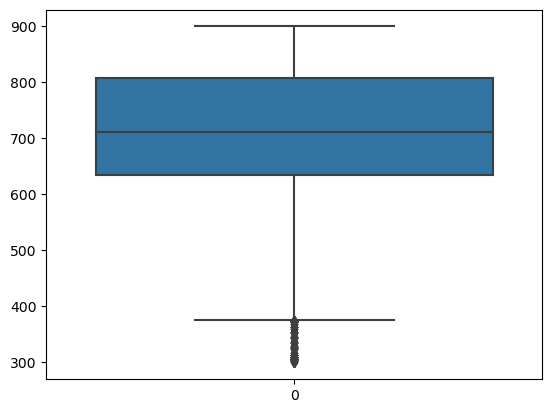

In [21]:
sns.boxplot(data=Bank.Cibil_Score)

#### Data Visualization

In [22]:
Bank.loan.value_counts(normalize=True)

no     0.838124
yes    0.161876
Name: loan, dtype: float64

In [25]:
import plotly.express as px

fig = px.pie(Bank,names='loan',color='loan',
             color_discrete_map={'Yes':'yellow',
                                 'No':'red'})
fig.show()

#### 4. Breaking Data into Two Part
* Quantitative Variable
* Qualitative Variable

In [26]:
Bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,Cibil_Score,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,668,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,684,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,788,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,888,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,703,4,feb,380,1,-1,0,unknown,no


In [27]:
Quantitative_Variable = Bank.select_dtypes(include=[np.number])
Quantitative_Variable.head(3)

,age,balance,Cibil_Score,day,duration,campaign,pdays,previous
0,56,1933,668,19,44,2,-1,0
1,31,3,684,20,91,2,-1,0
2,27,891,788,18,240,1,-1,0


In [28]:
Qualitative_Variable = Bank.select_dtypes(include=['object'])
Qualitative_Variable.head(3)

,job,marital,education,default,housing,loan,contact,month,poutcome,subscribed
0,admin.,married,unknown,no,no,no,telephone,nov,unknown,no
1,unknown,married,secondary,no,no,no,cellular,jul,unknown,no
2,services,married,secondary,no,yes,no,cellular,jul,unknown,no


#### Converting qualitative variable into number

In [29]:
from sklearn.preprocessing import LabelEncoder

Qualitative_Variable = Qualitative_Variable.apply(LabelEncoder().fit_transform) # label in ascending order
Qualitative_Variable.head(3)

,job,marital,education,default,housing,loan,contact,month,poutcome,subscribed
0,0,1,3,0,0,0,1,9,3,0
1,11,1,1,0,0,0,0,5,3,0
2,7,1,1,0,1,0,0,5,3,0


In [30]:
Final_combined = pd.concat([Quantitative_Variable,Qualitative_Variable],axis=1)
Final_combined.head()

,age,balance,Cibil_Score,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,subscribed
0,56,1933,668,19,44,2,-1,0,0,1,3,0,0,0,1,9,3,0
1,31,3,684,20,91,2,-1,0,11,1,1,0,0,0,0,5,3,0
2,27,891,788,18,240,1,-1,0,7,1,1,0,1,0,0,5,3,0
3,57,3287,888,22,867,1,84,3,4,0,2,0,0,0,0,6,2,1
4,31,119,703,4,380,1,-1,0,9,1,1,0,1,0,0,3,3,0


## 5. Data Partition

In [32]:
from sklearn.model_selection import train_test_split

X = Final_combined.drop('loan', axis = 1)
Y = Final_combined[['loan']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state=56) 

In [33]:
train = pd.concat([X_train,y_train],axis=1)
train.head()

,age,balance,Cibil_Score,day,duration,campaign,pdays,previous,job,marital,education,default,housing,contact,month,poutcome,subscribed,loan
2831,28,619,482,7,327,2,-1,0,1,1,1,0,0,1,5,3,0,0
3330,36,0,737,12,398,6,-1,0,7,2,1,0,1,0,8,3,1,0
4333,50,199,404,3,116,2,253,1,9,1,2,0,1,0,3,0,0,1
1589,39,1242,610,12,303,3,-1,0,0,2,1,0,1,2,8,3,0,0
596,54,869,540,14,152,2,-1,0,7,1,1,0,0,0,1,3,0,0


## Model Building

In [34]:
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=56)
Model3 = sfs(logreg, n_features_to_select=5, direction='forward', scoring='accuracy')
Model3.fit(X_train,y_train)  # fit = apply

SequentialFeatureSelector(estimator=LogisticRegression(random_state=56),
                          n_features_to_select=5, scoring='accuracy')

In [35]:
Model3.feature_names_in_

array(['age', 'balance', 'Cibil_Score', 'day', 'duration', 'campaign',
       'pdays', 'previous', 'job', 'marital', 'education', 'default',
       'housing', 'contact', 'month', 'poutcome', 'subscribed'],
      dtype=object)

In [36]:
Model3.get_feature_names_out()

array(['age', 'balance', 'Cibil_Score', 'day', 'duration'], dtype=object)

In [37]:
X_train = X_train.loc[:,['age', 'balance', 'Cibil_Score', 'day', 'duration']]
X_train.head()

,age,balance,Cibil_Score,day,duration
2831,28,619,482,7,327
3330,36,0,737,12,398
4333,50,199,404,3,116
1589,39,1242,610,12,303
596,54,869,540,14,152


In [38]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
Model2 = logreg.fit(X_train, y_train)

In [39]:
Model2.intercept_ 

array([-0.00083957])

In [40]:
Model2.coef_ 

array([[-0.01209744, -0.00018228, -0.00141537,  0.00657376, -0.00025622]])

In [41]:
Model2.feature_names_in_

array(['age', 'balance', 'Cibil_Score', 'day', 'duration'], dtype=object)

## Step 6: Predictions on Train Dataset

In [42]:
train = pd.concat([X_train,y_train],axis=1)
train.head()

,age,balance,Cibil_Score,day,duration,loan
2831,28,619,482,7,327,0
3330,36,0,737,12,398,0
4333,50,199,404,3,116,1
1589,39,1242,610,12,303,0
596,54,869,540,14,152,0


In [43]:
train['Probability_Bad']= Model2.predict_proba(X_train)[:,1]  # [Row , column]
train.head()

,age,balance,Cibil_Score,day,duration,loan,Probability_Bad
2831,28,619,482,7,327,0,0.236426
3330,36,0,737,12,398,0,0.182044
4333,50,199,404,3,116,1,0.227269
1589,39,1242,610,12,303,0,0.173480
596,54,869,540,14,152,0,0.178915


In [44]:
train['Predicted'] = np.where(train['Probability_Bad'] >= 0.7,1,0) 
train.head()

,age,balance,Cibil_Score,day,duration,loan,Probability_Bad,Predicted
2831,28,619,482,7,327,0,0.236426,0
3330,36,0,737,12,398,0,0.182044,0
4333,50,199,404,3,116,1,0.227269,0
1589,39,1242,610,12,303,0,0.173480,0
596,54,869,540,14,152,0,0.178915,0


## Step 7: Model Performance

In [46]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted'], train['loan'])
matrix

array([[3298,  626],
       [   0,    0]], dtype=int64)

In [49]:
Accuracy_Train=((3298+0)/(3924)*100)
print(Accuracy_Train)

84.04689092762487


In [50]:
from sklearn.metrics import classification_report

print(classification_report(train['loan'],train['Predicted']))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      3298
           1       0.00      0.00      0.00       626

    accuracy                           0.84      3924
   macro avg       0.42      0.50      0.46      3924
weighted avg       0.71      0.84      0.77      3924



## Step 8: Prediction on Test Dataset

In [53]:
X_test = X_test.loc[:,['age', 'balance', 'Cibil_Score', 'day', 'duration']]
X_test.head()

,age,balance,Cibil_Score,day,duration
2093,59,31,708,16,41
4812,50,697,871,14,118
4518,45,2185,747,19,167
174,41,1052,679,12,335
2392,32,410,825,23,115


In [54]:
test = pd.concat([X_test,y_test],axis=1)
test.head()

,age,balance,Cibil_Score,day,duration,loan
2093,59,31,708,16,41,0
4812,50,697,871,14,118,0
4518,45,2185,747,19,167,0
174,41,1052,679,12,335,1
2392,32,410,825,23,115,0


In [56]:
test['Probability_Bad'] = Model2.predict_proba(X_test)[:,1]
test.head()

,age,balance,Cibil_Score,day,duration,loan,Probability_Bad
2093,59,31,708,16,41,0,0.164153
4812,50,697,871,14,118,0,0.129685
4518,45,2185,747,19,167,0,0.128009
174,41,1052,679,12,335,1,0.160222
2392,32,410,825,23,115,0,0.181140


In [57]:
test['Predicted'] = np.where(test['Probability_Bad'] >= 0.7,1,0) 
test.head()

,age,balance,Cibil_Score,day,duration,loan,Probability_Bad,Predicted
2093,59,31,708,16,41,0,0.164153,0
4812,50,697,871,14,118,0,0.129685,0
4518,45,2185,747,19,167,0,0.128009,0
174,41,1052,679,12,335,1,0.160222,0
2392,32,410,825,23,115,0,0.181140,0


## Model Performace

In [59]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test['Predicted'],test['loan'])
print(matrix)

[[813 168]
 [  0   0]]


In [60]:
Accuracy_test = ((813+0)/(981)*100)
Accuracy_test

82.87461773700305

In [61]:
from sklearn.metrics import classification_report
print(classification_report(test['loan'],test['Predicted']))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       813
           1       0.00      0.00      0.00       168

    accuracy                           0.83       981
   macro avg       0.41      0.50      0.45       981
weighted avg       0.69      0.83      0.75       981



* Accuracy of Model is 83%,Hence Model Performance is good Fit on test Data
* Accuracy of Bad Customer Capture by Model is 0% ( Sensitivity )
* Accuracy of Good Customer Capture by Model is 0%

In [62]:
x = list(X_train.columns)
x.insert(0,'Intercept')
Model_Values = pd.DataFrame(np.concatenate((Model2.intercept_.tolist(), Model2.coef_.flatten())),index=x,columns=['Coefficient'])
Model_Values

,Coefficient
Intercept,-0.000840
age,-0.012097
balance,-0.000182
Cibil_Score,-0.001415
day,0.006574
duration,-0.000256


#### y=-0.000840+0.006574*day-0.012097*age-0.000256*duration-0.000182*balance-0.001415*cibil_score